# Clean dataset using influence functions and neural networks


This notebook cares about how to fit a neural network to some data and determine the most influential points. Consider a simple dataset with

$$
\begin{align*}
x &\sim \mathsf{U}(-1, 1) \in \mathbb{R}^d \\
\mu &= \sin(x_1)^2 \sin(x_2)^2 + 0.01 x_1^3 \cos(x_1)^2 \\
y &\sim \mathcal{N} \left (\mu, 0.3 \right )
\end{align*}
$$

repetitive characteristics. The intuition behind choosing this dataset is that it is the same regression pattern getting higher repsonse the further one moves it the right. Generating this dataset is as simply as

In [2]:
import numpy as np
num_samples = 10000
d = 2
w = 8
x = np.random.uniform(-w, w, size=[num_samples, d])
x1, x2 = x[:, 0], x[:, 1]
mus = np.sin(x1) ** 2 * np.sin(x2) ** 2 + 0.01 * x1 ** 3 * np.cos(x1) ** 2
sigma = 0.3
y = mus + np.random.normal(0, sigma, size=num_samples)

In [3]:
from sklearn.model_selection import train_test_split
from valuation.utils import Dataset

arg_flipper = lambda x1, x2, y1, y2: (x1, y1, x2, y2) # hacky
dataset = Dataset(*arg_flipper(*train_test_split(x, y, train_size=0.70)))

is straightforward using python. As usual a closer inspection of the data is helpful. The data is plotted by the following function.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


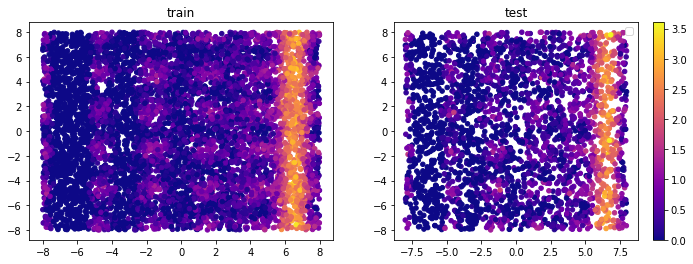

In [4]:
from valuation.utils.plotting import plot_datasets

datasets = {
    'train': (dataset.x_train, dataset.y_train),
    'test': (dataset.x_test, dataset.y_test)
}
regression_values = {
    'train':  dataset.y_train,
    'test': dataset.y_test
}
plot_datasets(datasets, colors=regression_values, s=20)

## Fit a neural network to the data

First, a 2-layer neural network is created and fitted with pyDVL.

In [11]:
from valuation.models.neural_network_torch_model import NNTorchModel
from valuation.models.pytorch_model import PyTorchSupervisedModel, PyTorchOptimizer
import torch.nn.functional as F
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler()
transformer.fit(dataset.x_train)
model = PyTorchSupervisedModel(
    model=NNTorchModel(d, 1, [16, 16, 16]),
    objective=F.mse_loss,
    num_epochs=100,
    batch_size=128,
    optimizer=PyTorchOptimizer.ADAM,
    optimizer_kwargs={
        "lr": 0.001,
        "weight_decay": 0.01
    },
)
model.fit(
    transformer.transform(dataset.x_train),
    dataset.y_train
)

Training loss: 1.1410810947418213
Training loss: 1.099881887435913
Training loss: 1.2125147581100464
Training loss: 1.2193876504898071
Training loss: 1.0945649147033691
Training loss: 1.0985705852508545
Training loss: 1.295045256614685
Training loss: 1.201641321182251
Training loss: 1.3775928020477295
Training loss: 1.0319455862045288
Training loss: 1.1690394878387451
Training loss: 0.8716257214546204
Training loss: 1.1827523708343506
Training loss: 1.0981613397598267
Training loss: 1.0293020009994507
Training loss: 1.0868630409240723
Training loss: 0.8637321591377258
Training loss: 1.0426208972930908
Training loss: 1.1518189907073975
Training loss: 1.094443440437317
Training loss: 0.868168830871582
Training loss: 0.803390383720398
Training loss: 0.776344358921051
Training loss: 1.2206768989562988
Training loss: 0.8133864402770996
Training loss: 0.7898268103599548
Training loss: 1.0913139581680298
Training loss: 0.926430344581604
Training loss: 0.8361409902572632
Training loss: 0.85730

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


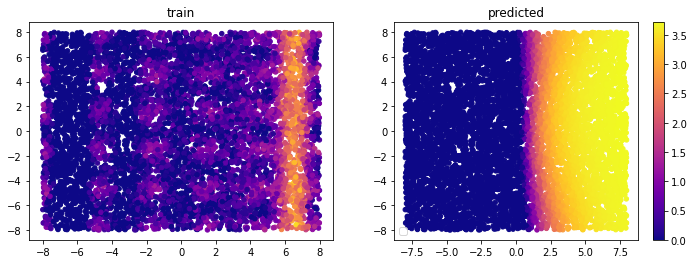

In [12]:
pred_y = model.predict(dataset.x_train)
datasets = {
    'train': (dataset.x_train, dataset.y_train),
    'predicted': (dataset.x_train, pred_y)
}
regression_values = {
    'train':  dataset.y_train,
    'predicted': pred_y
}
plot_datasets(datasets, colors=regression_values, s=20)